**<h1>TRANSFORMAÇÃO DE DADOS<h1>**

**-Este notebook objetiva a transformação dos dados**

**-Aplicar modelos para normalizar as colunas**

**-Propor um preenchimento dos dados faltantes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
#pd.set_option('precision', 2)

In [327]:
#Caso utilize o google colab

# from google.colab import files

# uploaded = files.upload()

In [328]:
df = pd.read_csv("C:/Users/rodri/OneDrive/Área de Trabalho/PUCMG/Sistemas Inteligentes/Projeto Sistemas Inteligentes/ppl-cd-pcd-sist-int-2022-2-compartilhamento-de-bicicletas/src/data/df_playes_com_draft_socolunasFloat.csv")


In [329]:
from datetime import date

# # Convertendo aniversario para datetime
# # # Convertemos para datetime para podermos acessar a data
# # # de maneira mais facil pelos atributos do datetime
df["BIRTHDATE"] = pd.to_datetime(df["BIRTHDATE"])

today = date.today()
def getAge(birthday):
    return today.year - birthday.year - ((today.month,
                                          today.day) < (birthday.month,
                                                        birthday.day))
# # Aplicando funcao
df.BIRTHDATE = df.BIRTHDATE.map(lambda x: getAge(x))

#Modificando o nome das colunas "BIRTHDATE" para "age" e "Unnamed: 0" para "cod_player"
df.rename(columns={"BIRTHDATE": "age", "Unnamed: 0" : "cod_player"},inplace=True)

* Verificando os valores ausentes

In [330]:
# Calcula o total e a % de valores ausentes
num_ausentes = df.isna().sum()
porc_ausentes = df.isna().sum() * 100 / len(df)
# DataFrame com as informações computadas acima
df_ausentes = pd.DataFrame({
'Dados ausentes': num_ausentes,
'Porcentagem': porc_ausentes
})
df_ausentes

Dados ausentes  Porcentagem
cod_player                                0     0.000000
value                                     0     0.000000
age                                     108    20.262664
HEIGHT                                  108    20.262664
WEIGHT                                  108    20.262664
PTS                                     108    20.262664
AST                                     108    20.262664
REB                                     108    20.262664
PIE                                     147    27.579737
heightWOShoesInches                     224    42.026266
weightLBS                               226    42.401501
wingspanInches                          222    41.651032
reachStandingInches                     224    42.026266
verticalLeapStandingInches              281    52.720450
verticalLeapMaxInches                   281    52.720450
timeLaneAgility                         284    53.283302
timeThreeQuarterCourtSprint             282    52.908068
repsBenchPress135                       332    62.288931
pctBodyFat                              228    42.776735
heightWShoesInches                      227    42.589118
lengthHandInches                        270    50.656660
widthHandInches                         270    50.656660
timeModifiedLaneAgility                 373    69.981238

* Temos valores ausentes na mesma proporção para as categorias ```BIRTHDATE```,```HEIGHT```,```WEIGHT```,```PTS```,```AST```,```REB```

* Iremos particionar a base para saber se esses campos faltantes estao no mesmo jogador

In [331]:
d1 = df.copy()

In [332]:
colunas_faltantes = ['cod_player','age', 'HEIGHT', 'WEIGHT', 'PTS', 'AST', 'REB']

In [333]:
d1 = d1[colunas_faltantes]

* Selecionando as linhas que possuem dados completos nos  atributos selecionados

In [334]:
d2 = d1[(d1.age.notnull()) &
    (d1.HEIGHT.notnull()) &
    (d1.WEIGHT.notnull()) &
    (d1.PTS.notnull()) &
    (d1.AST.notnull()) &
    (d1.REB.notnull())]

*  Através do merge com a base completa, iremos obter apenas os registros preenchidos

In [335]:
d3 = pd.merge(df,d2,how='right',left_on=['cod_player','age', 'HEIGHT', 'WEIGHT', 'PTS', 'AST', 'REB'],right_on=['cod_player','age', 'HEIGHT', 'WEIGHT', 'PTS', 'AST', 'REB'])


In [336]:
print(f'Tamanho da nova base de dados {d3.shape}\n')
print(f'Tamanho da base de dados antiga {df.shape}\n')

Tamanho da nova base de dados (425, 23)

Tamanho da base de dados antiga (533, 23)



In [337]:
# Calcula o total e a % de valores ausentes
num_ausentes = d3.isna().sum()
porc_ausentes = d3.isna().sum() * 100 / len(d3)
# DataFrame com as informações computadas acima
df_ausentes = pd.DataFrame({
'Dados ausentes': num_ausentes,
'Porcentagem': porc_ausentes
})
df_ausentes

Dados ausentes  Porcentagem
cod_player                                0     0.000000
value                                     0     0.000000
age                                       0     0.000000
HEIGHT                                    0     0.000000
WEIGHT                                    0     0.000000
PTS                                       0     0.000000
AST                                       0     0.000000
REB                                       0     0.000000
PIE                                      39     9.176471
heightWOShoesInches                     147    34.588235
weightLBS                               149    35.058824
wingspanInches                          145    34.117647
reachStandingInches                     147    34.588235
verticalLeapStandingInches              195    45.882353
verticalLeapMaxInches                   195    45.882353
timeLaneAgility                         197    46.352941
timeThreeQuarterCourtSprint             196    46.117647
repsBenchPress135                       236    55.529412
pctBodyFat                              151    35.529412
heightWShoesInches                      150    35.294118
lengthHandInches                        193    45.411765
widthHandInches                         193    45.411765
timeModifiedLaneAgility                 286    67.294118

# VERIFICANDO OUTLIERS

### Da apresentação anterior, verifcamos que o atributo ```PIE``` possui outliers que extrapolam a escala no gráfico de dispersão

* Iremos utilizar o boxplot 
* Utilizar alguma função para filtrar esses valores

![Boxplot](https://fernandafperes.com.br/blog/interpretacao-boxplot/g2.png)

<AxesSubplot:>

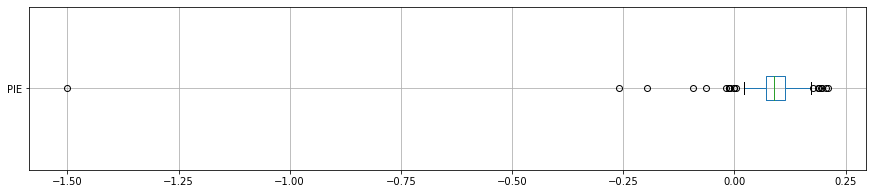

In [338]:
d3.boxplot(column=['PIE'], figsize=(15, 3), vert=False)

<function matplotlib.pyplot.show(close=None, block=None)>

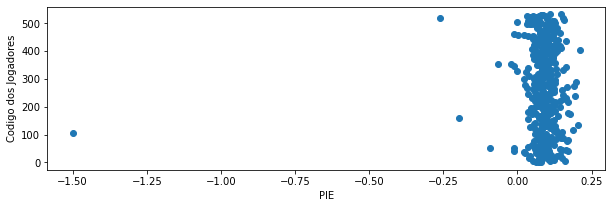

In [339]:
fig,ax = plt.subplots(figsize=(10,3))
ax.scatter(d3.PIE,d3.cod_player)
#Eixo x
ax.set_xlabel('PIE')
#Eixo y
ax.set_ylabel('Codigo dos Jogadores')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

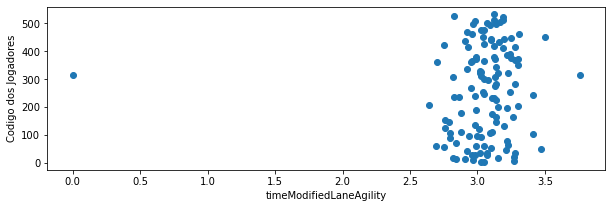

In [404]:
fig,ax = plt.subplots(figsize=(10,3))
ax.scatter(d6.timeModifiedLaneAgility,d6.cod_player)
#Eixo x
ax.set_xlabel('timeModifiedLaneAgility')
#Eixo y
ax.set_ylabel('Codigo dos Jogadores')
plt.show

<AxesSubplot:>

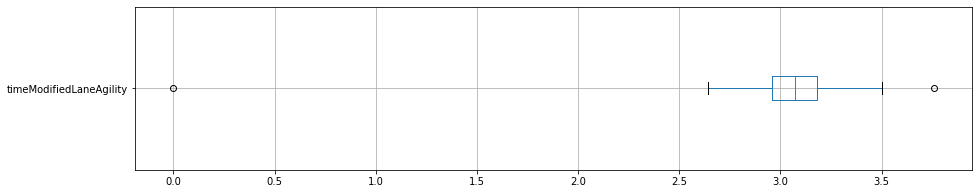

In [405]:
d6.boxplot(column=['timeModifiedLaneAgility'], figsize=(15, 3), vert=False)

### Pelo gráfico de dispersão fica mais visível que a quantidade de outliers é pequena em 
### relação à população

* Iremos remover esses outliers utilizando os quarties
* Limite inferior: O valor mais baixo em que geralmente apenas 0.5% dos dados estão abaixo dele
* Limite superior: O valor mais alto em que geralmente apenas 0.5% dos dados estão acima dele

                    limite_inferior = Q1 - 1.5 * IIQ
                    limite_superior = Q3 + 1.5 * IIQ

O quartil 25% é: 0.071
O quartil 75% é: 0.11275
O intervalo interquartil é: 0.04175000000000001
antes de remover outliers 425
depois de remover outliers 366
outliers 59


<AxesSubplot:>

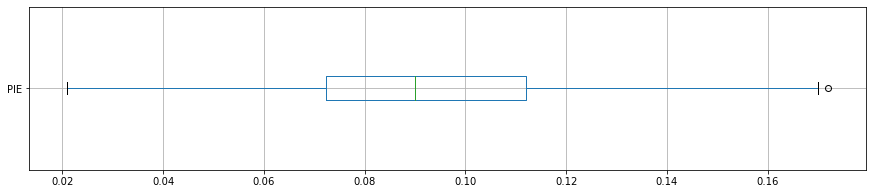

In [341]:
Q1 = d3.PIE.quantile(0.25)
Q3 = d3.PIE.quantile(0.75)
IQR = Q3 - Q1

print(f'O quartil 25% é: {Q1}')
print(f'O quartil 75% é: {Q3}')
print(f'O intervalo interquartil é: {IQR}')

# Determinando o limite superior
limite_superior = Q3+1.5*IQR
# Determinando o limite inferior
limite_inferior = Q1-1.5*IQR

novo_pie = d3.loc[(d3.PIE < limite_superior) & (d3.PIE > limite_inferior)]
print(f'antes de remover outliers {len(d3)}')
print(f'depois de remover outliers {len(novo_pie)}')
print(f'outliers {len(d3)-len(novo_pie)}')

abc = pd.DataFrame(novo_pie,columns=['PIE'])

abc.boxplot(column = ['PIE'],figsize=(15,3),vert = False)



In [347]:
d4 = novo_pie.copy()

In [348]:
# Calcula o total e a % de valores ausentes
num_ausentes = d4.isna().sum()
porc_ausentes = d4.isna().sum() * 100 / len(d4)
# DataFrame com as informações computadas acima
df_ausentes = pd.DataFrame({
'Dados ausentes': num_ausentes,
'Porcentagem': porc_ausentes
})
df_ausentes

Dados ausentes  Porcentagem
cod_player                                0     0.000000
value                                     0     0.000000
age                                       0     0.000000
HEIGHT                                    0     0.000000
WEIGHT                                    0     0.000000
PTS                                       0     0.000000
AST                                       0     0.000000
REB                                       0     0.000000
PIE                                       0     0.000000
heightWOShoesInches                     123    33.606557
weightLBS                               125    34.153005
wingspanInches                          121    33.060109
reachStandingInches                     123    33.606557
verticalLeapStandingInches              167    45.628415
verticalLeapMaxInches                   167    45.628415
timeLaneAgility                         168    45.901639
timeThreeQuarterCourtSprint             167    45.628415
repsBenchPress135                       203    55.464481
pctBodyFat                              125    34.153005
heightWShoesInches                      125    34.153005
lengthHandInches                        161    43.989071
widthHandInches                         161    43.989071
timeModifiedLaneAgility                 243    66.393443

## CRIANDO NOVOS ATRIBUTOS

* Através do weightLBS e do pctBodyFat é possível descobrir a massa magra do jogador

* massa_magra = weightLBSx(1-pctBodyFat)

* Temos o peso do jogador no draft e o peso na temporada atual, iremos adicionar uma coluna para verificar o quanto o jogador ganhou um perdeu de peso

In [370]:
massa_magra_draft = d4[(d4.pctBodyFat.notnull()) &
    d4.weightLBS.notnull()]

In [371]:
d5 = pd.merge(df,massa_magra_draft,how='right',left_on=['cod_player', 'value', 'age', 'HEIGHT', 'WEIGHT', 'PTS', 'AST',
       'REB', 'PIE', 'heightWOShoesInches', 'weightLBS', 'wingspanInches',
       'reachStandingInches', 'verticalLeapStandingInches',
       'verticalLeapMaxInches', 'timeLaneAgility',
       'timeThreeQuarterCourtSprint', 'repsBenchPress135', 'pctBodyFat',
       'heightWShoesInches', 'lengthHandInches', 'widthHandInches',
       'timeModifiedLaneAgility'],right_on=['cod_player', 'value', 'age', 'HEIGHT', 'WEIGHT', 'PTS', 'AST',
       'REB', 'PIE', 'heightWOShoesInches', 'weightLBS', 'wingspanInches',
       'reachStandingInches', 'verticalLeapStandingInches',
       'verticalLeapMaxInches', 'timeLaneAgility',
       'timeThreeQuarterCourtSprint', 'repsBenchPress135', 'pctBodyFat',
       'heightWShoesInches', 'lengthHandInches', 'widthHandInches',
       'timeModifiedLaneAgility'])
d5

cod_player       value   age  HEIGHT  WEIGHT   PTS   AST   REB    PIE  \
0             2   1517981.0  24.0    81.0   240.0   1.5   0.4   3.0  0.073   
1             3   1517981.0  24.0    81.0   240.0   1.5   0.4   3.0  0.073   
2             8   4137302.0  25.0    81.0   235.0  18.3   1.3   7.8  0.124   
3             9   2761920.0  24.0    79.0   190.0  11.9   3.6   3.7  0.077   
4            14   1620564.0  31.0    78.0   226.0   4.2   0.9   2.3  0.038   
5            15  12178571.0  31.0    78.0   213.0   5.6   1.4   2.3  0.072   
6            16   6571800.0  24.0    73.0   180.0  25.7   9.4   4.1  0.151   
7            18   1517981.0  24.0    71.0   200.0   5.1   0.6   1.1  0.076   
8            19   1517981.0  24.0    71.0   200.0   5.1   0.6   1.1  0.076   
9            22   2498760.0  23.0    78.0   236.0   5.0   0.9   2.9  0.043   
10           24  23437500.0  26.0    78.0   223.0  24.7   3.9   5.6  0.132   
11           26  34379100.0  32.0    72.0   184.0  17.7   4.6   3.6  0.114   
12           28  13446428.0  28.0    75.0   220.0  12.8   5.4   2.8  0.090   
13           29   2161920.0  25.0    83.0   245.0   7.1   1.3   2.9  0.094   
14           30   2161920.0  25.0    83.0   245.0   7.1   1.3   2.9  0.094   
15           34   1752950.0  27.0    78.0   240.0   5.4   0.8   3.0  0.063   
16           35   9258000.0  31.0    81.0   254.0   7.9   1.0   8.4  0.106   
17           36    110998.0  26.0    79.0   212.0   2.0   0.4   2.8  0.098   
18           37    163818.0  30.0    79.0   210.0   1.2   0.8   3.0  0.023   
19           38    776873.0  33.0    81.0   250.0  11.6   3.5   5.0  0.085   
20           40  10375678.0  34.0    83.0   265.0   7.6   1.7   7.5  0.108   
21           42  41254920.0  33.0    77.0   220.0  25.3  11.2   7.9  0.170   
22           43   1620564.0  36.0    80.0   235.0   9.8   1.5   3.8  0.073   
23           44  16071429.0  31.0    78.0   220.0  14.7   1.8   3.5  0.085   
24           45  40108950.0  34.0    82.0   240.0  29.0   5.3   7.3  0.163   
25           46  33460350.0  30.0    74.0   195.0  28.1   5.7   4.8  0.150   
26           47    554988.0  37.0    83.0   250.0  13.7   1.7   4.5  0.096   
27           48   2090040.0  25.0    76.0   190.0   7.8   1.1   1.8  0.059   
28           49   1517981.0  23.0    83.0   215.0   9.8   0.9   4.3  0.143   
29           52  11454048.0  29.0    77.0   215.0   6.7   3.0   4.3  0.102   
30           54     99020.0  25.0    80.0   255.0   0.7   0.3   1.5  0.037   
31           58   1517981.0  27.0    77.0   205.0   5.3   1.1   2.6  0.076   
32           59   1517981.0  27.0    77.0   205.0   3.8   1.2   2.4  0.091   
33           60   1517981.0  27.0    77.0   205.0   3.8   1.2   2.4  0.091   
34           61  15415730.0  30.0    83.0   240.0   9.2   2.3   7.1  0.101   
35           63  28500000.0  32.0    79.0   225.0  20.4   4.2   5.6  0.125   
36           64   1517981.0  24.0    81.0   205.0   4.5   0.5   2.4  0.049   
37           67   3934320.0  24.0    78.0   225.0   9.6   2.0   5.6  0.088   
38           71  18900000.0  28.0    73.0   190.0  20.2   3.3   3.8  0.112   
39           74   5572680.0  22.0    77.0   195.0  15.2   4.7   4.6  0.087   
40           77   4642800.0  29.0    76.0   220.0   7.4   1.7   3.9  0.095   
41           81  26000000.0  32.0    83.0   260.0  24.5   3.8  11.7  0.172   
42           85  13545000.0  34.0    80.0   235.0  12.2   4.4   6.5  0.131   
43           86  10000000.0  31.0    79.0   210.0   7.5   4.8   2.5  0.102   
44           88  19500000.0  27.0    77.0   200.0  28.2   4.9   5.1  0.146   
45           89  27957238.0  29.0    82.0   279.0  17.5   2.6  13.5  0.153   
46           91   4991880.0  23.0    73.0   190.0  24.0   4.3   2.8  0.112   
47           92   2000000.0  28.0    77.0   210.0   6.7   2.2   1.9  0.077   
48           95   2137440.0  26.0    78.0   196.0   5.4   1.1   3.6  0.087   
49           98   3909902.0  24.0    83.0   243.0  12.9   1.6   9.9  0.147   
50          100  31258256.0

In [379]:
# def MassaMagra(x):
#    magra = dteste.weightLBS*(1-(dteste.pctBodyFat/100))
#    return magra

In [387]:
d5['LeanMass'] = d5.weightLBS*(1-(d5.pctBodyFat/100))

In [391]:
d5['WeightVariation'] = d5.WEIGHT - d5.weightLBS

In [393]:
d5.columns.values

array(['cod_player', 'value', 'age', 'HEIGHT', 'WEIGHT', 'PTS', 'AST',
       'REB', 'PIE', 'heightWOShoesInches', 'weightLBS', 'wingspanInches',
       'reachStandingInches', 'verticalLeapStandingInches',
       'verticalLeapMaxInches', 'timeLaneAgility',
       'timeThreeQuarterCourtSprint', 'repsBenchPress135', 'pctBodyFat',
       'heightWShoesInches', 'lengthHandInches', 'widthHandInches',
       'timeModifiedLaneAgility', 'LeanMass', 'WeightVariation'],
      dtype=object)

In [394]:
colunas_ordenadas = ['cod_player', 'value', 'age', 'HEIGHT', 'WEIGHT', 'PTS', 'AST',
       'REB', 'PIE','weightLBS','pctBodyFat','LeanMass', 'WeightVariation','heightWOShoesInches','wingspanInches','reachStandingInches', 'verticalLeapStandingInches',
       'verticalLeapMaxInches', 'timeLaneAgility',
       'timeThreeQuarterCourtSprint', 'repsBenchPress135','heightWShoesInches', 'lengthHandInches','widthHandInches',
       'timeModifiedLaneAgility']

In [395]:
d6 = d5[colunas_ordenadas]

In [396]:
d6.head()

cod_player      value   age  HEIGHT  WEIGHT   PTS  AST  REB    PIE  \
0           2  1517981.0  24.0    81.0   240.0   1.5  0.4  3.0  0.073   
1           3  1517981.0  24.0    81.0   240.0   1.5  0.4  3.0  0.073   
2           8  4137302.0  25.0    81.0   235.0  18.3  1.3  7.8  0.124   
3           9  2761920.0  24.0    79.0   190.0  11.9  3.6  3.7  0.077   
4          14  1620564.0  31.0    78.0   226.0   4.2  0.9  2.3  0.038   

   weightLBS  pctBodyFat  LeanMass  WeightVariation  heightWOShoesInches  \
0      233.2        5.25  220.9570              6.8                80.75   
1      237.0        5.40  224.2020              3.0                80.75   
2      225.2        5.40  213.0392              9.8                80.25   
3      194.0        8.60  177.3160             -4.0                78.25   
4      226.0        7.60  208.8240              0.0                77.50   

   wingspanInches  reachStandingInches  verticalLeapStandingInches  \
0           88.25                109.0                        29.0   
1           87.25                110.0                        29.5   
2           83.25                106.5                        33.0   
3           79.50                101.5                        31.0   
4           81.00                103.0                        29.5   

   verticalLeapMaxInches  timeLaneAgility  timeThreeQuarterCourtSprint  \
0                   35.0            12.19                         3.23   
1                   33.5            11.29                         3.21   
2                   37.5            11.66                         3.27   
3                   38.0            10.89                         3.09   
4                   37.5            10.77                         3.19   

   repsBenchPress135  heightWShoesInches  lengthHandInches  widthHandInches  \
0               11.0               81.75              9.50             10.0   
1               13.0               82.25              9.25             10.0   
2               15.0               81.50              9.00             10.0   
3                9.0               79.25              8.25              8.5   
4               14.0               79.00              9.00             10.5   

   timeModifiedLaneAgility  
0                     3.03  
1                     3.05  
2                     3.27  
3                     2.97  
4                     2.91

In [398]:
d6.shape

(239, 25)

### LIMPANDO A BASE DE DADOS

Apos uma pesquisa sobre o significado dos atributos, podemos perceber que a base contém muitos valores que se repetem ou podem ser considerados complementares. Por exemplo:

* ```heightWOShoesInches``` representa o tamanho do jogador descalço. Desta maneira,  o atributo ```height``` consegue demontrar a qualidade do jogador.

* ```heightWShoesInches``` é a altura com sapatos. Iremos considerar que apenas o atributo ```height``` é suficiente para classificar.

* ```verticalLeapStanding``` possuem duas colunas. Uma com o max e outra que provavelmente é a media dos saltos do jogador. Desta maneira, iremos utilizar apenas o atributo com a maior contagem dos saltos.



In [399]:
del d6['heightWOShoesInches']
del d6['heightWShoesInches']
del d6['verticalLeapMaxInches']

#Desta maneira, houve uma redução no numero de atributos. De 25 foram para 22
print("\nDimensao da base de dados NBA:\n{0}\n".format(d6.shape))


Dimensao da base de dados NBA:
(239, 22)



In [400]:
# Calcula o total e a % de valores ausentes
num_ausentes = d6.isna().sum()
porc_ausentes = d6.isna().sum() * 100 / len(d6)
# DataFrame com as informações computadas acima
df_ausentes = pd.DataFrame({
'Dados ausentes': num_ausentes,
'Porcentagem': porc_ausentes
})
df_ausentes

Dados ausentes  Porcentagem
cod_player                                0     0.000000
value                                     0     0.000000
age                                       0     0.000000
HEIGHT                                    0     0.000000
WEIGHT                                    0     0.000000
PTS                                       0     0.000000
AST                                       0     0.000000
REB                                       0     0.000000
PIE                                       0     0.000000
weightLBS                                 0     0.000000
pctBodyFat                                0     0.000000
LeanMass                                  0     0.000000
WeightVariation                           0     0.000000
wingspanInches                            0     0.000000
reachStandingInches                       0     0.000000
verticalLeapStandingInches               42    17.573222
timeLaneAgility                          43    17.991632
timeThreeQuarterCourtSprint              42    17.573222
repsBenchPress135                        78    32.635983
lengthHandInches                         37    15.481172
widthHandInches                          37    15.481172
timeModifiedLaneAgility                 116    48.535565

In [291]:
# def normalizacao(x):
#    normal = (max(dteste)-x)/(max(dteste)-min(dteste))
#    return normal


# argeg = list(map(normalizacao,dteste))
# d12 = pd.DataFrame(argeg,columns=['PIE'])
# print(d12)
# d45 = np.array([d12])

          PIE
0    0.076563
1    0.087084
2    0.080655
3    0.080655
4    0.092344
5    0.029223
6    0.059030
7    0.056692
8    0.050847
9    0.078317
10        NaN
11   0.075395
12   0.063121
13   0.101110
14   0.081239
15   0.035067
16   0.078901
17   0.078901
18        NaN
19   0.060783
20   0.098188
21        NaN
22   0.046172
23   0.038574
24   0.056692
25   0.076563
26   0.070719
27   0.068381
28   0.068381
29   0.109293
30   0.086499
31   0.061368
32   0.066043
33   0.109877
34   0.073641
35   0.060199
36   0.129749
37   0.023963
38   0.080655
39   0.073641
40   0.028054
41   0.035652
42   0.067212
43   0.088837
44   0.039743
45   0.178258
46   0.130333
47   0.063705
48   0.101695
49   0.085330
50   0.084161
51   0.082408
52   0.078901
53   0.070134
54   0.070134
55   0.064290
56   0.070719
57   0.050263
58   0.094681
59   0.068966
60   0.071888
61   0.073057
62   0.057861
63   0.072472
64   0.026300
65   0.068381
66   0.067797
67   0.090590
68   0.082992
69   0.057861
70   0

### PREENCHENDO OS DADOS FALTANTES

Os atributos possuem muitos valores faltantes, desta maneira, torna-se interessante procurar alguma correlação de um atributo com outro, para preencher os dados omissos

* Como a única coluna completamente preenchida é a ```value``` iremos utilizar ela para completar os dados das seguintes categorias:

* ```BIRTHDATE```, ```HEIGHT```, ```WEIGHT```,```PTS```,```AST```, ```REB```, ```PIE```


* Primeiro, torna-se necessário particionar a base de dados

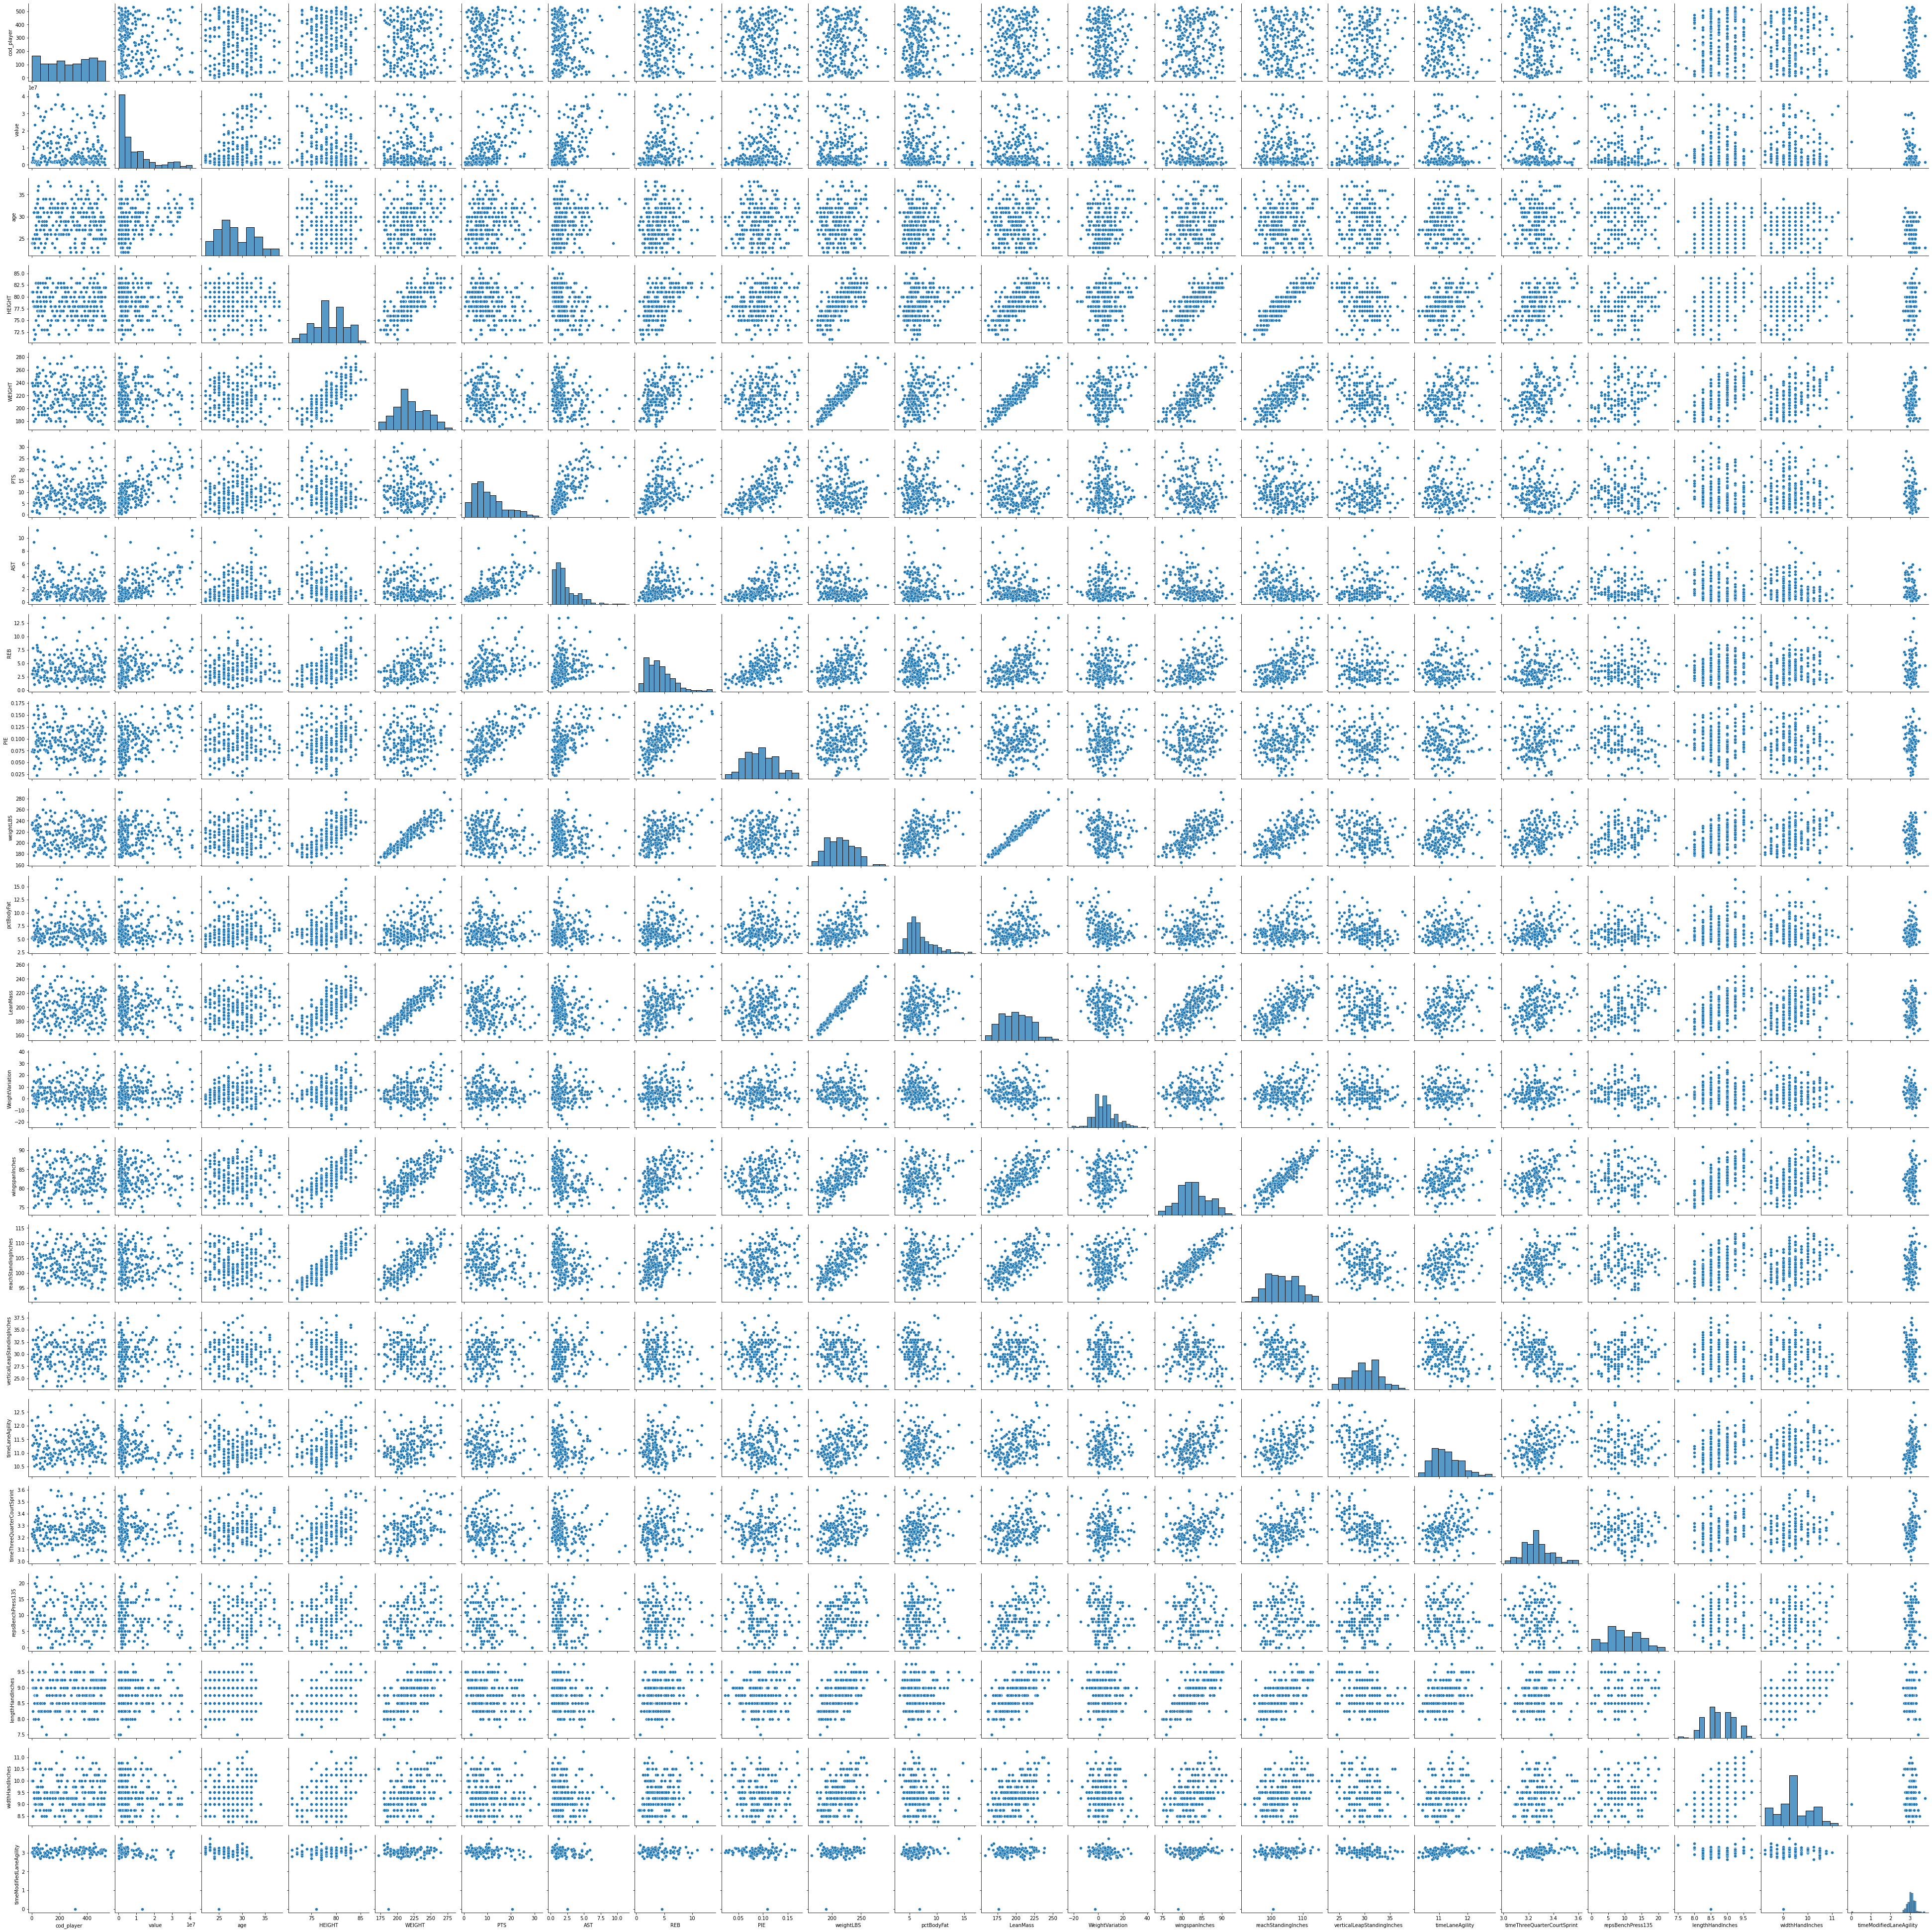

In [401]:
sns.pairplot(d6)

O quartil 25% é: 2.96
O quartil 75% é: 3.1799999999999997
O intervalo interquartil é: 0.21999999999999975
antes de remover outliers 239
depois de remover outliers 121
outliers 118


<AxesSubplot:>

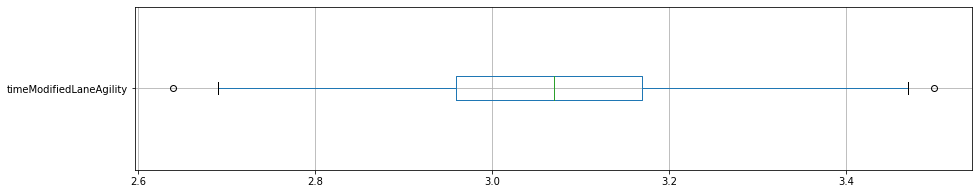

In [407]:
Q1t = d6.timeModifiedLaneAgility.quantile(0.25)
Q3t = d6.timeModifiedLaneAgility.quantile(0.75)
IQRt = Q3t - Q1t

print(f'O quartil 25% é: {Q1t}')
print(f'O quartil 75% é: {Q3t}')
print(f'O intervalo interquartil é: {IQRt}')

# Determinando o limite superior
limite_superiort = Q3t+1.5*IQRt
# Determinando o limite inferior
limite_inferiort = Q1t-1.5*IQRt

novo_t = d6.loc[(d6.timeModifiedLaneAgility < limite_superiort) & (d6.timeModifiedLaneAgility > limite_inferiort)]
print(f'antes de remover outliers {len(d6)}')
print(f'depois de remover outliers {len(novo_t)}')
print(f'outliers {len(d6)-len(novo_t)}')

abct = pd.DataFrame(novo_t,columns=['timeModifiedLaneAgility'])

abct.boxplot(column = ['timeModifiedLaneAgility'],figsize=(15,3),vert = False)

In [410]:
d7.shape

(121, 22)

In [414]:
# Calcula o total e a % de valores ausentes
num_ausentes = d7.isna().sum()
porc_ausentes = d7.isna().sum() * 100 / len(d7)
# DataFrame com as informações computadas acima
df_ausentes = pd.DataFrame({
'Dados ausentes': num_ausentes,
'Porcentagem': porc_ausentes
})
df_ausentes

Dados ausentes  Porcentagem
cod_player                                0     0.000000
value                                     0     0.000000
age                                       0     0.000000
HEIGHT                                    0     0.000000
WEIGHT                                    0     0.000000
PTS                                       0     0.000000
AST                                       0     0.000000
REB                                       0     0.000000
PIE                                       0     0.000000
weightLBS                                 0     0.000000
pctBodyFat                                0     0.000000
LeanMass                                  0     0.000000
WeightVariation                           0     0.000000
wingspanInches                            0     0.000000
reachStandingInches                       0     0.000000
verticalLeapStandingInches                0     0.000000
timeLaneAgility                           0     0.000000
timeThreeQuarterCourtSprint               0     0.000000
repsBenchPress135                        33    27.272727
lengthHandInches                          0     0.000000
widthHandInches                           0     0.000000
timeModifiedLaneAgility                   0     0.000000

In [408]:
d7 = novo_t.copy()

In [415]:
d8 = d7.dropna(axis=0)

In [416]:
# Calcula o total e a % de valores ausentes
num_ausentes = d8.isna().sum()
porc_ausentes = d8.isna().sum() * 100 / len(d8)
# DataFrame com as informações computadas acima
df_ausentes = pd.DataFrame({
'Dados ausentes': num_ausentes,
'Porcentagem': porc_ausentes
})
df_ausentes

Dados ausentes  Porcentagem
cod_player                                0          0.0
value                                     0          0.0
age                                       0          0.0
HEIGHT                                    0          0.0
WEIGHT                                    0          0.0
PTS                                       0          0.0
AST                                       0          0.0
REB                                       0          0.0
PIE                                       0          0.0
weightLBS                                 0          0.0
pctBodyFat                                0          0.0
LeanMass                                  0          0.0
WeightVariation                           0          0.0
wingspanInches                            0          0.0
reachStandingInches                       0          0.0
verticalLeapStandingInches                0          0.0
timeLaneAgility                           0          0.0
timeThreeQuarterCourtSprint               0          0.0
repsBenchPress135                         0          0.0
lengthHandInches                          0          0.0
widthHandInches                           0          0.0
timeModifiedLaneAgility                   0          0.0

### CORRELOGRAMA (Matriz de Correlação)

* Analise a relação entre pares de variáveis numéricas  

* Permitem visualizar as relações de todo o conjunto de dados de uma só vez

* A relação entre cada par de variáveis é geralmente mostrada com um gráfico de dispersão

* Enquanto a diagonal representa a distribuição de cada variável, usando um histograma ou um gráfico de densidade

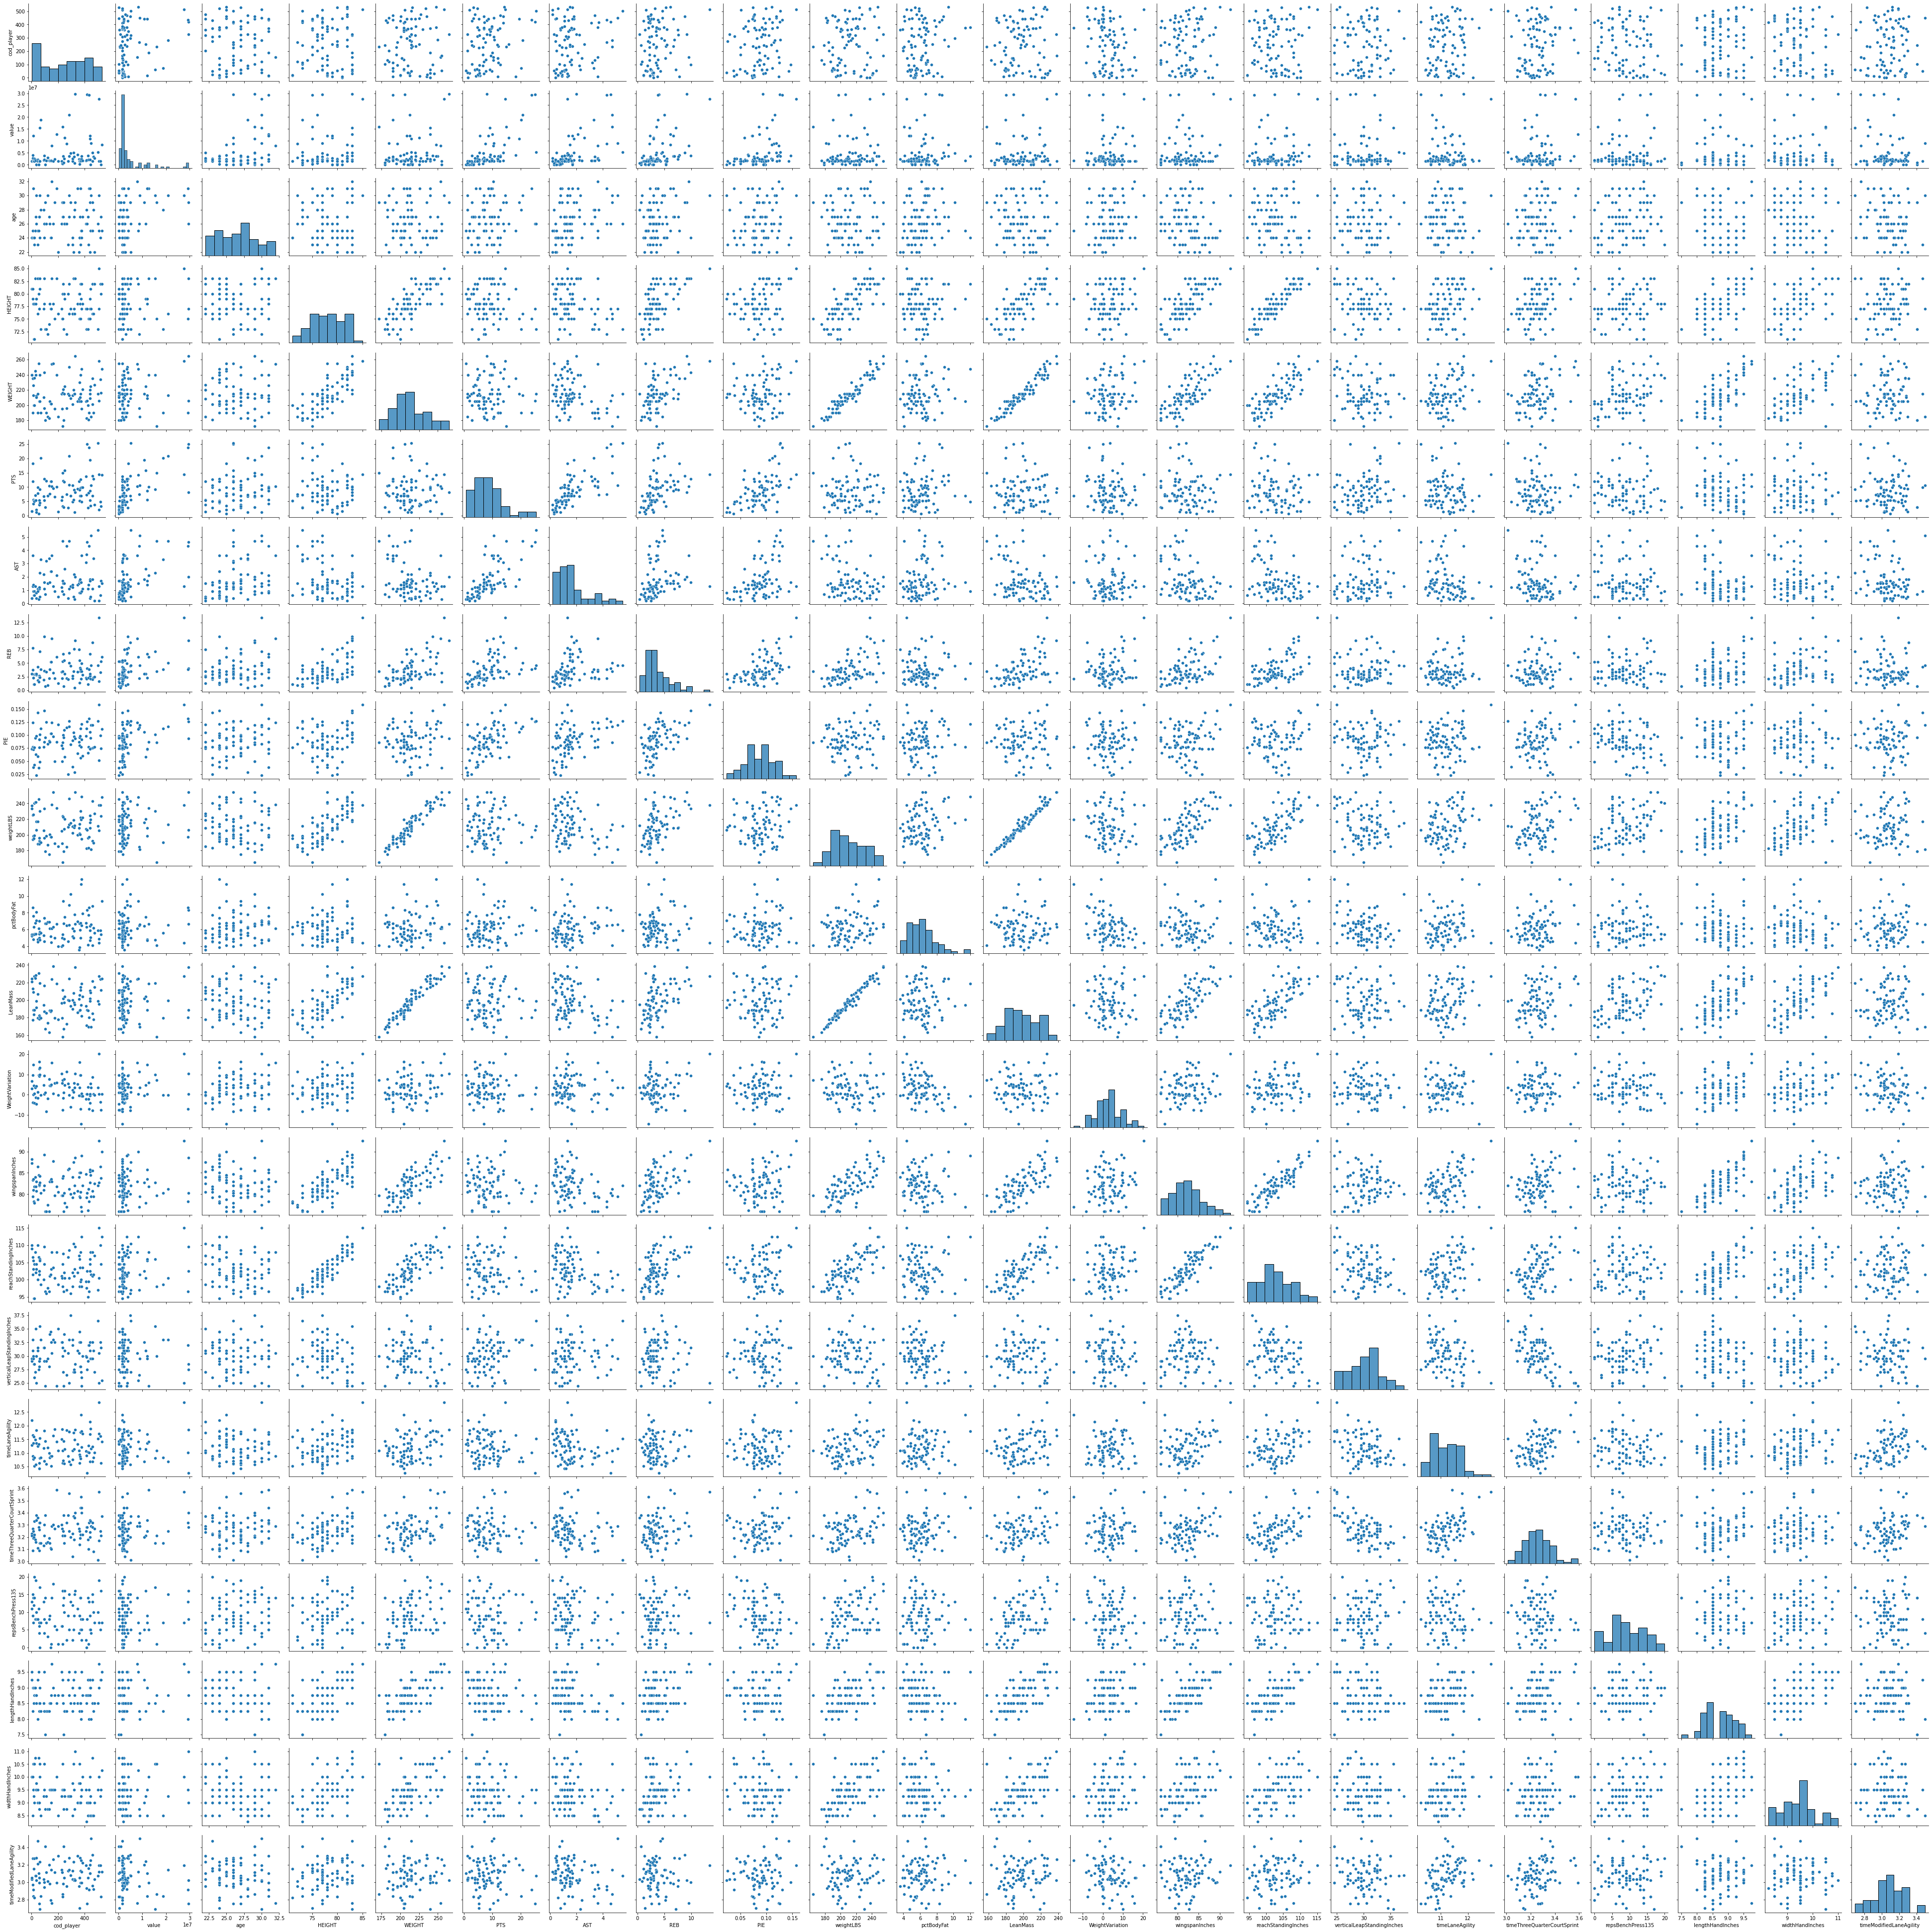

In [417]:
sns.pairplot(d8)

In [419]:
# Construção da matriz de correlação para features NBA
d8.corr(method='pearson')    # Aqui, vamos utilizar a correlação de Spearman

cod_player     value       age    HEIGHT  \
cod_player                     1.000000  0.206437  0.007516  0.036811   
value                          0.206437  1.000000  0.426088  0.115036   
age                            0.007516  0.426088  1.000000 -0.051016   
HEIGHT                         0.036811  0.115036 -0.051016  1.000000   
WEIGHT                         0.000471  0.142252 -0.013978  0.763033   
PTS                            0.258338  0.607547  0.194583 -0.057838   
AST                            0.196299  0.503427  0.317040 -0.264679   
REB                            0.165146  0.452784  0.204228  0.617212   
PIE                            0.179483  0.393262  0.073763  0.186155   
weightLBS                      0.067537  0.099630 -0.076404  0.723929   
pctBodyFat                     0.127933  0.086136  0.156863  0.092506   
LeanMass                       0.043974  0.087950 -0.106940  0.727820   
WeightVariation               -0.217477  0.150650  0.201250  0.193397   
wingspanInches                 0.112504  0.124046 -0.158632  0.754251   
reachStandingInches            0.065104  0.120247 -0.077684  0.914524   
verticalLeapStandingInches    -0.000377 -0.036753 -0.049724 -0.154300   
timeLaneAgility                0.148006  0.051368  0.003222  0.282522   
timeThreeQuarterCourtSprint    0.160887  0.208668  0.179826  0.413826   
repsBenchPress135             -0.103798  0.069959  0.194719  0.058623   
lengthHandInches               0.089631  0.082970 -0.154529  0.537772   
widthHandInches               -0.135477  0.118892 -0.128053  0.494764   
timeModifiedLaneAgility        0.095886 -0.217922 -0.139895  0.051925   

                               WEIGHT       PTS       AST       REB       PIE  \
cod_player                   0.000471  0.258338  0.196299  0.165146  0.179483   
value                        0.142252  0.607547  0.503427  0.452784  0.393262   
age                         -0.013978  0.194583  0.317040  0.204228  0.073763   
HEIGHT                       0.763033 -0.057838 -0.264679  0.617212  0.186155   
WEIGHT                       1.000000 -0.029125 -0.294244  0.538589  0.118313   
PTS                         -0.029125  1.000000  0.720556  0.427631  0.557392   
AST                         -0.294244  0.720556  1.000000  0.227644  0.431060   
REB                          0.538589  0.427631  0.227644  1.000000  0.549717   
PIE                          0.118313  0.557392  0.431060  0.549717  1.000000   
weightLBS                    0.954066 -0.007490 -0.294194  0.482708  0.098581   
pctBodyFat                   0.123837  0.170522  0.119197  0.045826  0.142022   
LeanMass                     0.959612 -0.038900 -0.324109  0.488154  0.073427   
WeightVariation              0.236222 -0.072713 -0.025830  0.228230  0.074319   
wingspanInches               0.742189 -0.031574 -0.312909  0.539048  0.184489   
reachStandingInches          0.776071 -0.080567 -0.325367  0.572432  0.175251   
verticalLeapStandingInches  -0.120023  0.243215  0.148919  0.028052 -0.028229   
timeLaneAgility              0.311928 -0.152033 -0.265357  0.146778  0.070858   
timeThreeQuarterCourtSprint  0.331353 -0.116236 -0.207238  0.236652  0.175900   
repsBenchPress135            0.324715 -0.083826 -0.147478  0.056249 -0.268280   
lengthHandInches             0.661025 -0.123707 -0.282335  0.388499  0.011764   
widthHandInches              0.550775 -0.065251 -0.200107  0.297456 -0.081962   
timeModifiedLaneAgility     -0.016065 -0.074935 -0.207792 -0.095761  0.069785   

                             weightLBS  pctBodyFat  LeanMass  WeightVariation  \
cod_player                    0.067537    0.127933  0.043974        -0.217477   
value                         0.099630    0.086136  0.087950         0.150650   
age                          -0.076404    0.156863 -0.106940         0.201250   
HEIGHT                        0.723929    0.092506  0.727820         0.193397   
WEIGHT                        0.954066    0.123837  0.959612         0.236222   

### NORMALIZAÇÃO DOS DADOS

* não é uma etapa obrigatória, mas uma boa prática, pois atributos em um padrão auxiliam o desempenho de modelos, algoritmos e afins

* Aqui, iremos utilizar dois modelos:  Reescalonamento e Padronização

In [423]:
for coluna in d8.columns:  # Para cada coluna,
    d8[coluna] = (  # Normalização min-max
        d8[coluna] - d8[coluna].min()
    ) / (d8[coluna].max() - d8[coluna].min())
d8.head(3)

C:\Users\rodri\AppData\Local\Temp\ipykernel_10076\767471357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d8[coluna] = (  # Normalização min-max


cod_player     value  age    HEIGHT    WEIGHT       PTS       AST  \
0    0.000000  0.049690  0.2  0.714286  0.731183  0.032389  0.037736   
1    0.001887  0.049690  0.2  0.714286  0.731183  0.032389  0.037736   
2    0.011321  0.138352  0.3  0.714286  0.677419  0.712551  0.207547   

        REB       PIE  weightLBS  pctBodyFat  LeanMass  WeightVariation  \
0  0.200000  0.370370   0.762542    0.196429  0.783196         0.611429   
1  0.200000  0.370370   0.804905    0.214286  0.823592         0.502857   
2  0.569231  0.748148   0.673356    0.214286  0.684629         0.697143   

   wingspanInches  reachStandingInches  verticalLeapStandingInches  \
0        0.742424             0.707317                    0.346154   
1        0.681818             0.756098                    0.384615   
2        0.439394             0.585366                    0.653846   

   timeLaneAgility  timeThreeQuarterCourtSprint  repsBenchPress135  \
0         0.744186                     0.379310               0.55   
1         0.395349                     0.344828               0.65   
2         0.538760                     0.448276               0.75   

   lengthHandInches  widthHandInches  timeModifiedLaneAgility  
0          0.888889         0.636364                 0.419753  
1          0.777778         0.636364                 0.444444  
2          0.666667         0.636364                 0.716049

In [424]:
d8.columns.values

array(['cod_player', 'value', 'age', 'HEIGHT', 'WEIGHT', 'PTS', 'AST',
       'REB', 'PIE', 'weightLBS', 'pctBodyFat', 'LeanMass',
       'WeightVariation', 'wingspanInches', 'reachStandingInches',
       'verticalLeapStandingInches', 'timeLaneAgility',
       'timeThreeQuarterCourtSprint', 'repsBenchPress135',
       'lengthHandInches', 'widthHandInches', 'timeModifiedLaneAgility'],
      dtype=object)

### Regressão Linear


Os passos para indução de um modelo são:

1.   Instanciar o modelo: ``` LinearRegression()```
2.   Treinar o modelo: ```fit()```

O método ```score()``` retorna o coeficiente R^2 de predição.


In [425]:
# Amostragem de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import matplotlib.pyplot as plt

colunas_atributos = ['age', 'HEIGHT', 'WEIGHT', 'PTS', 'AST',
       'REB', 'PIE', 'weightLBS', 'pctBodyFat', 'LeanMass',
       'WeightVariation', 'wingspanInches', 'reachStandingInches',
       'verticalLeapStandingInches', 'timeLaneAgility',
       'timeThreeQuarterCourtSprint', 'repsBenchPress135',
       'lengthHandInches', 'widthHandInches', 'timeModifiedLaneAgility']

X = d8[colunas_atributos].values
y = d8['value']

print("Numero de atributos original:")
print(X.shape)

Numero de atributos original:
(88, 20)


In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression()
lr.fit(X_train.values, y_train)

print("Regressão Linear (com atributos redundantes)")
print("Acurácia na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lr.score(X_test, y_test)))

Regressão Linear (com atributos redundantes)


c:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Acurácia na base de treinamento: 0.70
Acurácia na base de teste: -2.94


c:\Users\rodri\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [434]:
salario_jogador = np.array([[0.2, 0.714286, 0.731183, 0.032389, 0.037736, 0.200000, 0.370370, 0.762542, 0.196429, 0.783196, 0.611429, 0.742424, 0.707317, 0.346154, 0.744186, 0.379310, 0.55, 0.888889, 0.636364, 0.419753]])


In [443]:
d7.head()

cod_player      value   age  HEIGHT  WEIGHT   PTS  AST  REB    PIE  \
0           2  1517981.0  24.0    81.0   240.0   1.5  0.4  3.0  0.073   
1           3  1517981.0  24.0    81.0   240.0   1.5  0.4  3.0  0.073   
2           8  4137302.0  25.0    81.0   235.0  18.3  1.3  7.8  0.124   
3           9  2761920.0  24.0    79.0   190.0  11.9  3.6  3.7  0.077   
4          14  1620564.0  31.0    78.0   226.0   4.2  0.9  2.3  0.038   

   weightLBS  pctBodyFat  LeanMass  WeightVariation  wingspanInches  \
0      233.2        5.25  220.9570              6.8           88.25   
1      237.0        5.40  224.2020              3.0           87.25   
2      225.2        5.40  213.0392              9.8           83.25   
3      194.0        8.60  177.3160             -4.0           79.50   
4      226.0        7.60  208.8240              0.0           81.00   

   reachStandingInches  verticalLeapStandingInches  timeLaneAgility  \
0                109.0                        29.0            12.19   
1                110.0                        29.5            11.29   
2                106.5                        33.0            11.66   
3                101.5                        31.0            10.89   
4                103.0                        29.5            10.77   

   timeThreeQuarterCourtSprint  repsBenchPress135  lengthHandInches  \
0                         3.23               11.0              9.50   
1                         3.21               13.0              9.25   
2                         3.27               15.0              9.00   
3                         3.09                9.0              8.25   
4                         3.19               14.0              9.00   

   widthHandInches  timeModifiedLaneAgility  
0             10.0                     3.03  
1             10.0                     3.05  
2             10.0                     3.27  
3              8.5                     2.97  
4             10.5                     2.91

In [ ]:
def desnormalizacao(x,d7):
   desnormal = x*(d7.value.max()-d7.value.min())+d7.value.min()
   return desnormal


salario = lr.predict(salario_jogador)
salario_dolar = desnormalizacao(salario,d7)
print(f'O salário PREDITO do jogador, contendo as características passadas, foi: US${salario_dolar}')    

In [ ]:
#O PolynomialFeaures() aumenta a dimensão dos dados produzindo novos atributos 
# que são combinações lineares dos dados originais.

# X = MinMaxScaler().fit_transform(df_norm)
# X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

# print("Polynomial Features (atributos redundantes):")
# print(X.shape)
# y = df_norm['value']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# print("Base de treinamento:{0}".format(X_train.shape))
# print("Base de teste:{0}".format(X_test.shape))

### APLICAÇÃO DE UM NOVO MODELO NA BASE DE DADOS

In [ ]:
# Amostragem de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import matplotlib.pyplot as plt

X = d8[colunas_atributos].values
y = d8['value']

print("Numero de atributos original:")
print(X.shape)

#O PolynomialFeaures() aumenta a dimensão dos dados produzindo novos atributos 
#que são combinações lineares dos dados originais.

X = MinMaxScaler().fit_transform(d8)
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print("Polynomial Features (atributos redundantes):")
print(X.shape)
y = d8['value']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print("Base de treinamento:{0}".format(X_train.shape))
print("Base de teste:{0}".format(X_test.shape))


Numero de atributos original:
(533, 6)


### Ridge (Regressão linear com regularização L2)

Força uma redução do valor dos coeficientes, penalizando coeficientes grandes que não contribuem significativamente para a explicação da variância do sinal.

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1.


In [ ]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Acurácia na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))



### Comparação da Regressão linear e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método. Pode-se observar como a regularização afeta a magnitude dos coeficientes do Ridge como um todo, mas sem zerar coeficientes de uma forma geral.

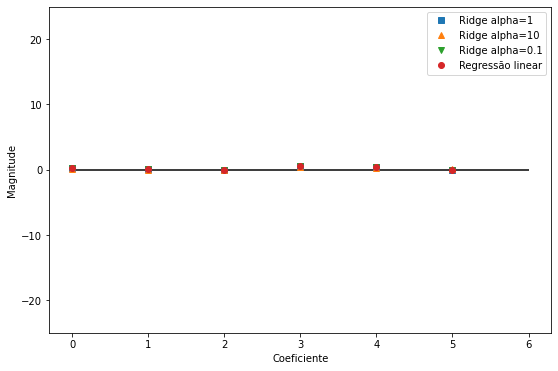

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Regressão linear")
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()



### LASSO (Regressão linear com regularização L1)

Força uma redução do valor dos coeficientes, podendo zerar diversos coeficientes cujos atributos não contribuem significativamente para a previsão. Muito utilizado no apoio à tarefa de seleção de atributos (*feature selection*).

A força da regularização é dada pelo atributo ```alpha```, com valor *default* igual a 1. ```Alpha=0``` resulta na regressão linear tradicional.


In [ ]:
lasso = Lasso().fit(X_train, y_train)
print("Lasso alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso.coef_ != 0)))


lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.01")
print("Acurácia na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso001.coef_ != 0)))


lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.0001")
print("Acurácia na base de treinamento: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso00001.coef_ != 0)))



Lasso alpha=1
Acurácia na base de treinamento: 0.00
Acurácia na base de teste: -0.00
Número de atributos usados: 0
Lasso alpha=.01
Acurácia na base de treinamento: 0.47
Acurácia na base de teste: 0.46
Número de atributos usados: 1
Lasso alpha=.0001
Acurácia na base de treinamento: 0.61
Acurácia na base de teste: 0.63
Número de atributos usados: 6


### Comparação da LASSO e Ridge

O gráfico exibe a magnitude dos coeficientes obtidos por cada método.

Text(0, 0.5, 'Magnitude')

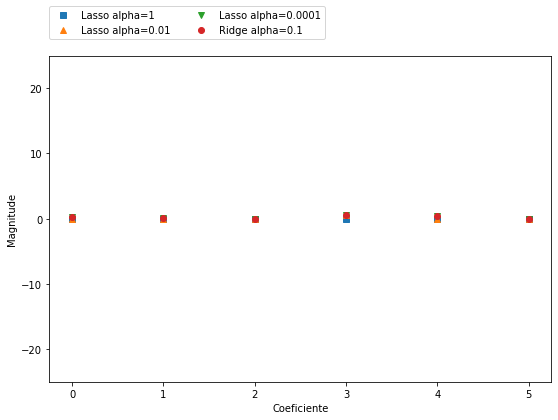

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")


### -------- OS CÓDIGOS ABAIXO NÃO FORAM UTILIZADOS------------ ###

In [ ]:
#Testando o algoritmo de matriz de correlação, mesmo com dados faltantes.
#Entretanto, o resultado não é apresentado
float_fields = df_particao_primeiras_categorias.dtypes[df_particao_primeiras_categorias.dtypes == "float64"].index
corr = np.corrcoef(df_particao_primeiras_categorias[float_fields].transpose())
correlacao = pd.DataFrame(data=corr, index=float_fields, columns=float_fields)

print("\nMatriz de correlação dos atributos float:\n{0}".format(correlacao))


Matriz de correlação dos atributos float:
              value  BIRTHDATE    HEIGHT    WEIGHT       PTS       AST  \
value      1.000000   0.270552 -0.020053  0.030932  0.729936  0.678575   
BIRTHDATE  0.270552   1.000000 -0.004091  0.103535  0.079333  0.159135   
HEIGHT    -0.020053  -0.004091  1.000000  0.784841 -0.092010 -0.302854   
WEIGHT     0.030932   0.103535  0.784841  1.000000 -0.033180 -0.219082   
PTS        0.729936   0.079333 -0.092010 -0.033180  1.000000  0.756421   
AST        0.678575   0.159135 -0.302854 -0.219082  0.756421  1.000000   
REB        0.430324   0.081574  0.435689  0.460509  0.560441  0.364175   

                REB  
value      0.430324  
BIRTHDATE  0.081574  
HEIGHT     0.435689  
WEIGHT     0.460509  
PTS        0.560441  
AST        0.364175  
REB        1.000000  
